# Mudcard
- **How to choose the best model? or do we just try several techniques and pick the one with the best score?**
    - You have two models.
    - How do you decide which one is better? 
    - Usually the model with the lower generalization error is better.
    - So you try many and pick the one with the best test score.
    - You can of course come up with other definitions but the field chooses based on the test scores.
- **Should we consider conditional probabilities when designing decision trees?**
    - I'm not sure what you mean. Could you clarify on Ed Discussion or come to the office hours?
- **How are trees made?**
    - the same way a linear or logistic regression model is made
    - the mathemical model that converts features to a prediction is a sequence of if-else statements, a tree
    - an optimization algorithm (usually a greedy algorithm) finds the best way to split the features for you (this is equivalent to gradient descent in linear and logistic regression)
    - the cost function is some measure of goodness which could be the RMSE in regression or accuracy in classification
    - sklearn does all of this for you
- **Ive read about the concept of data point 'leverage' before, and this measure seems similar to our discussion on how models treat feature outlier points. Are these concepts related in any way?**
    - not necessarily
    - a leverage point is not necessarily an outlier
    - it's usually a point which has a surprising target variable
    - e.g., in the make moons dataset, a blue point in the middle of the red points would be leveraged
- **Are there any algorithms that effectively choose the best subsets or paths?**
    - yes, sklearn does this for you
- **Is the output of the predict function in LogisticRegression calculated from predict_proba with critical probability = 0.5?**
    - yes



## Supervised ML algorithms
By the end of this module, you will be able to
- Summarize how decision trees, random forests, and support vector machines work
- Describe how the predictions of these techniques behave in classification and regression
- Describe which hyper-parameters should be tuned

### A decision tree in regression

In [26]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
np.random.seed(10)
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

n_samples = 30

X = np.random.rand(n_samples)
y = true_fun(X) + np.random.randn(n_samples) * 0.1

X_new = np.linspace(0, 1, 1000)

reg = RandomForestRegressor(n_estimators=1,max_depth=1)
reg.fit(X[:, np.newaxis],y)
y_new = reg.predict(X_new[:, np.newaxis])


In [27]:
help(RandomForestRegressor)

Help on class RandomForestRegressor in module sklearn.ensemble._forest:

class RandomForestRegressor(ForestRegressor)
 |  RandomForestRegressor(n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest regressor.
 |  
 |  A random forest is a meta estimator that fits a number of classifying
 |  decision trees on various sub-samples of the dataset and uses averaging
 |  to improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------
 |  n_estimators 

In [28]:
#############################################################
# HUGE thanks to Drew Solomon and Yifei Song (DSI alumni) 
# for preparing the visualizations in this lecture!
#############################################################
# check out helper_functions.ipynb for more details
%run ./helper_functions.ipynb

hyperparameters = {
    'n_estimators': [1, 3, 10, 30],
    'max_depth': [1, 2, 3, 10, 30]
}

vis(X, y, RandomForestRegressor, hyperparameters, X_new)

interactive(children=(SelectionSlider(description='n_estimators', options=(1, 3, 10, 30), value=1), SelectionS…

## How to avoid overfitting with random forests?
- tune some (or all) of following hyperparameters:
   - max_depth
   - max_features
- With sklearn random forests, **do not tune n_estimators**!
   - the larger this value is, the better the forest will be
   - set n_estimators to maybe 100 while tuning hyperparameters
   - increase it if necessary once the best hyperparameters are found


| ML algo                      	| suitable for large datasets? 	| behaviour wrt outliers 	| non-linear? 	|  params to tune  	|smooth predictions| easy to interpret?|
|------------------------------	|:----------------------------:	|:----------------------:	|:-----------:	|:----------------:	|:----------------:	|:----------------:	|
| linear regression            	|              yes             	|linear extrapolation|      no     	| l1 and/or l2 reg 	| yes | yes|
| logistic regression          	|              yes             	|scales with distance from the decision boundary|      no     	| l1 and/or l2 reg 	| yes | yes|
| random forest regression     	|<font color='red'>so so</font> |<font color='red'>constant</font>|<font color='red'>yes</font>|<font color='red'>max_features,  max_depth</font>| <font color='red'>no</font>|<font color='red'>so so</font>|
| random forest classification 	|              tbd             	|           tbd          	|     tbd     	|        tbd       	| tbd | tbd|
| SVM rbf regression               	|              tbd             	|           tbd          	|     tbd     	|        tbd       	| tbd | tbd|
| SVM rbf classification           	|              tbd             	|           tbd          	|     tbd     	|        tbd       	| tbd | tbd|

## A random forest in classification

In [23]:
from sklearn.datasets import make_moons
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ParameterGrid

# create the data
X,y = make_moons(noise=0.2, random_state=1,n_samples=200)
# set the hyperparameters
clf = RandomForestClassifier(n_estimators=1,max_depth=3,random_state=0)
# fit the model
clf.fit(X,y)
# predict new data
#y_new = clf.predict(X_new)
# predict probabilities
#y_new = clf.predict_proba(X_new)

RandomForestClassifier(max_depth=3, n_estimators=1, random_state=0)

In [24]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------


In [25]:
# initialize RandomForestClassifier
ML_algo = RandomForestClassifier(random_state=42) 

# set RF parameter grid
hyperparameters = {
    'n_estimators': [1, 3, 10, 30],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

plot_clf_contour(hyperparameters, X, y)

interactive(children=(SelectionSlider(description='n_estimators', options=(1, 3, 10, 30), value=1), SelectionS…

FigureWidget({
    'data': [{'colorbar': {'title': {'text': 'predicted probability'}},
              'colorsca…

| ML algo                      	| suitable for large datasets? 	| behaviour wrt outliers 	| non-linear? 	|  params to tune  	|smooth predictions| easy to interpret?|
|------------------------------	|:----------------------------:	|:----------------------:	|:-----------:	|:----------------:	|:----------------:	|:----------------:	|
| linear regression            	|              yes             	|linear extrapolation|      no     	| l1 and/or l2 reg 	| yes | yes|
| logistic regression          	|              yes             	|scales with distance from the decision boundary|      no     	| l1 and/or l2 reg 	| yes | yes|
| random forest regression     	|so so|constant|yes|max_features,  max_depth|no|so so|
| random forest classification 	|<font color='red'>so so</font> |<font color='red'>step-like, difficult to tell</font>|<font color='red'>yes</font>|<font color='red'>max_features,  max_depth</font>| <font color='red'>no</font>|<font color='red'>so so</font>|
| SVM rbf regression               	|              tbd             	|           tbd          	|     tbd     	|        tbd       	| tbd | tbd|
| SVM rbf classification           	|              tbd             	|           tbd          	|     tbd     	|        tbd       	| tbd | tbd|

# Quiz 1


## Support Vector Machine
- very versatile technique, it comes in lots of flavors/types, read more about it [here](https://scikit-learn.org/stable/modules/svm.html)
- SVM classifier motivation
   - points in n dimensional space with class 0 and 1
   - we want to find the (n-1) dimensional hyperplane that best separates the points
   - this hyperplane is our (linear) decision boundary
- we cover SVMs with radial basis functions (rbf)
   - we apply a kernel function (a non-linear transformation) to the data points
   - the kernel function basically "smears" the  points
   - gaussian rbf kernel: $\exp(-\gamma (|x - x'|)^2)$ where $\gamma > 0$

## SVR

In [35]:
import numpy as np
from sklearn.svm import SVR
np.random.seed(10)
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

n_samples = 30

X = np.random.rand(n_samples)
y = true_fun(X) + np.random.randn(n_samples) * 0.1

X_new = np.linspace(-0.5, 1.5, 2000)

reg = SVR(gamma = 1, C = 1)
reg.fit(X[:, np.newaxis],y)
y_new = reg.predict(X_new[:, np.newaxis])


In [36]:
help(SVR)

Help on class SVR in module sklearn.svm._classes:

class SVR(sklearn.base.RegressorMixin, sklearn.svm._base.BaseLibSVM)
 |  SVR(*, kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)
 |  
 |  Epsilon-Support Vector Regression.
 |  
 |  The free parameters in the model are C and epsilon.
 |  
 |  The implementation is based on libsvm. The fit time complexity
 |  is more than quadratic with the number of samples which makes it hard
 |  to scale to datasets with more than a couple of 10000 samples. For large
 |  datasets consider using :class:`~sklearn.svm.LinearSVR` or
 |  :class:`~sklearn.linear_model.SGDRegressor` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  Read more in the :ref:`User Guide <svm_regression>`.
 |  
 |  Parameters
 |  ----------
 |  kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable,          default='rbf'


In [37]:

hyperparameters = {
    'gamma': [1e-3, 1e-1, 1e1, 1e3, 1e5],
    'C': [1e-1, 1e0, 1e1]
}

vis(X, y, SVR, hyperparameters, X_new)


interactive(children=(SelectionSlider(description='gamma', options=(0.001, 0.1, 10.0, 1000.0, 100000.0), value…

# Quiz 2

Let's measure how long it takes to fit a linear regression, random forest regression, and SVR as a function of `n_samples` using our toy regression dataset. 

Check [this](https://stackoverflow.com/questions/7370801/how-do-i-measure-elapsed-time-in-python) stackoverflow post to figure out how to measure the execution time of a couple of lines of code. 

Set n_estimators to 10 and max_depth to 3 in the random forest. 

Set the gamma and C parameters to 1 in SVR. 

Fit models with n_samples = 1000, 2000, 3000, 4000, 5000. Measure how long it takes to fit each model.

Plot the run time as a function of n_samples for the three models. You might need to adjust the y axis range to check some of the statements.

Which of these statements are true?

- The random forest run-time scales linearly with n_samples.
- The linear regression model is the fastest to fit. 
- The SVR run-time scales worse than linear. (I.e., if we double n_sample, the fit time more than doubles.)


In [ ]:
import time
from sklearn.linear_model import LinearRegression

n_samples = np.linspace(1000,5000,5,dtype=int)

timer_lin = []
timer_RF = []
timer_SVR = []

for n_sample in n_samples:
    X = np.random.rand(n_sample)
    y = true_fun(X) + np.random.randn(n_sample) * 0.1
    
    # add your code below

    times = []
    for i in range(10):
        reg = LinearRegression()
        start_time = time.time()
        reg.fit(X[:, np.newaxis],y)
        end_time = time.time()    
        times.append(end_time-start_time)
    timer_lin.append(np.mean(times))

    times = []
    for i in range(10):
        reg = SVR(gamma = 1, C = 1)
        start_time = time.time()
        reg.fit(X[:, np.newaxis],y)
        end_time = time.time()
        times.append(end_time-start_time)
    timer_SVR.append(np.mean(times))
    
    times = []
    for i in range(10):
        reg = RandomForestRegressor(n_estimators=10,max_depth=3)
        start_time = time.time()
        reg.fit(X[:, np.newaxis],y)
        end_time = time.time()  
        times.append(end_time-start_time)
    timer_RF.append(np.mean(times))

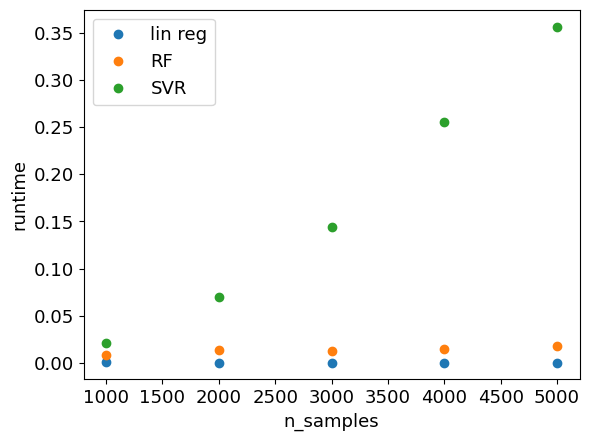

In [34]:
# prepare the plot below:
plt.plot(n_samples,timer_lin,'o',label='lin reg')
plt.plot(n_samples,timer_RF,'o',label='RF')
plt.plot(n_samples,timer_SVR,'o',label='SVR')
plt.xlabel('n_samples')
plt.ylabel('runtime')
#plt.ylim([0,0.1])
plt.legend()
plt.show()

| ML algo                      	| suitable for large datasets? 	| behaviour wrt outliers 	| non-linear? 	|  params to tune  	|smooth predictions| easy to interpret?|
|------------------------------	|:----------------------------:	|:----------------------:	|:-----------:	|:----------------:	|:----------------:	|:----------------:	|
| linear regression            	|              yes             	|linear extrapolation|      no     	| l1 and/or l2 reg 	| yes | yes|
| logistic regression          	|              yes             	|scales with distance from the decision boundary|      no     	| l1 and/or l2 reg 	| yes | yes|
| random forest regression     	|so so |constant|yes|max_features,  max_depth| no|so so|
| random forest classification 	|so so |step-like, difficult to tell|yes|max_features,  max_depth| no|so so|
| SVM rbf regression               	|<font color='red'>no</font>|<font color='red'>non-linear extrapolation</font>|<font color='red'>yes</font>|<font color='red'>C, gamma</font>|<font color='red'>yes</font>|<font color='red'>so so</font>|
| SVM rbf classification           	|              tbd             	|           tbd          	|     tbd     	|        tbd       	| tbd | tbd|

## SVC

In [11]:
from sklearn.datasets import make_moons
import numpy as np
from sklearn.svm import SVC

# create the data
X,y = make_moons(noise=0.2, random_state=1,n_samples=200)
# set the hyperparameters
clf = SVC(gamma = 1, C = 1, probability=True)
# fit the model
clf.fit(X,y)
# predict new data
#y_new = clf.predict(X_new)
# predict probabilities
#y_new = clf.predict_proba(X_new)

SVC(C=1, gamma=1, probability=True)

In [12]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 

In [13]:
# initialize RandomForestClassifier
ML_algo = SVC(probability=True)

# SVC parameter grid
hyperparameters = {
    'gamma': [1e-3, 1e-1, 1e1, 1e3, 1e5],
    'C': [1e-1, 1e0, 1e1]
}

plot_clf_contour(hyperparameters, X, y)

interactive(children=(SelectionSlider(description='gamma', options=(0.001, 0.1, 10.0, 1000.0, 100000.0), value…

FigureWidget({
    'data': [{'colorbar': {'title': {'text': 'predicted probability'}},
              'colorsca…

| ML algo                      	| suitable for large datasets? 	| behaviour wrt outliers 	| non-linear? 	|  params to tune  	|smooth predictions| easy to interpret?|
|------------------------------	|:----------------------------:	|:----------------------:	|:-----------:	|:----------------:	|:----------------:	|:----------------:	|
| linear regression            	|              yes             	|linear extrapolation|      no     	| l1 and/or l2 reg 	| yes | yes|
| logistic regression          	|              yes             	|scales with distance from the decision boundary|      no     	| l1 and/or l2 reg 	| yes | yes|
| random forest regression     	|so so |constant|yes|max_features,  max_depth| no|so so|
| random forest classification 	|so so |step-like, difficult to tell|yes|max_features,  max_depth| no|so so|
| SVM rbf regression               	|no|non-linear extrapolation|yes|C, gamma|yes|so so|
| SVM rbf classification           	|<font color='red'>no</font>|<font color='red'>50-50</font>|<font color='red'>yes</font>|<font color='red'>C, gamma</font>|<font color='red'>yes</font>|<font color='red'>so so </font>|

# Quiz 3
Bias variance trade off

Which gamma value gives the best trade off between high bias and high variance? Work through the steps to answer the question.

- Use random_state = 42 where-ever necessary.
- Split X, y into X_train, X_val, y_train, y_val such that 70% of the points are in train.
- Fit SVC models with C = 1, and gamma = 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3 on the training set.
- Measure the validation accuracy for each gamma.
- Which gamma value gives the highest validation accuracy?


## Mud card